# Poetry - Working on a larger dataset

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Getting Data Ready

In [3]:
lines = []
with open('poetry.txt', 'r') as file:
    for line in file.readlines():
        lines.append(line.split('\n')[0])
        
print(f'{len(lines)} lines loaded')

1692 lines loaded


### Tokenization

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

total_vocab = len(tokenizer.index_word) + 1 # Index zero is reserved for padding, that why we +1
print(f'Size of vocabulary set is {total_vocab}')

sequences = tokenizer.texts_to_sequences(lines)
max_length = max([len(x) for x in sequences])
print(f'Maximum length is {max_length}')

Size of vocabulary set is 2690
Maximum length is 16


In [6]:
print(f'Element 1 looks like this : {sequences[1]}')
print(f'Element 1 is also this : {tokenizer.sequences_to_texts([sequences[1]])}')

Element 1 looks like this : [2, 11, 15, 31, 361, 8, 24, 1218]
Element 1 is also this : ['and you that are blooming in your prime']


### Data Preprocessing

In [7]:
input_sequences = []

for seq in sequences:
    for i in range(1, len(seq)):
        input_sequences.append(seq[:i+1])
        
input_sequences = pad_sequences(input_sequences, maxlen=max_length, padding='pre')
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
labels = tf.keras.utils.to_categorical(labels, num_classes=total_vocab)

In [8]:
print(f'Training set shape is {xs.shape}')
print(f'Labels shape is {labels.shape}')

Training set shape is (12038, 15)
Labels shape is (12038, 2690)


## Building the model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_vocab, 100, input_length=max_length - 1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500)),
    tf.keras.layers.Dense(units=total_vocab, activation='softmax')
])

adam = tf.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 1000)             2404000   
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2690)              2692690   
                                                                 
Total params: 5,365,690
Trainable params: 5,365,690
Non-trainable params: 0
_________________________________________________________________


In [12]:
with tf.device('GPU:0'):
    history = model.fit(xs, labels, epochs=250)

Epoch 1/250
377/377 [==============================] - 12s 23ms/step - loss: 6.6970 - accuracy: 0.0669
Epoch 2/250
377/377 [==============================] - 4s 10ms/step - loss: 6.1650 - accuracy: 0.0803
Epoch 3/250
377/377 [==============================] - 3s 9ms/step - loss: 5.8326 - accuracy: 0.0933
Epoch 4/250
377/377 [==============================] - 3s 8ms/step - loss: 5.3966 - accuracy: 0.1170
Epoch 5/250
377/377 [==============================] - 3s 9ms/step - loss: 4.8653 - accuracy: 0.1434
Epoch 6/250
377/377 [==============================] - 3s 8ms/step - loss: 4.2180 - accuracy: 0.1779
Epoch 7/250
377/377 [==============================] - 4s 10ms/step - loss: 3.4660 - accuracy: 0.2685
Epoch 8/250
377/377 [==============================] - 3s 9ms/step - loss: 2.7084 - accuracy: 0.4053
Epoch 9/250
377/377 [==============================] - 3s 7ms/step - loss: 2.0857 - accuracy: 0.5422
Epoch 10/250
377/377 [==============================] - 3s 8ms/step - loss: 1.6436 - ac

377/377 [==============================] - 3s 7ms/step - loss: 0.4706 - accuracy: 0.8530
Epoch 82/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4704 - accuracy: 0.8536
Epoch 83/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4696 - accuracy: 0.8554
Epoch 84/250
377/377 [==============================] - 3s 7ms/step - loss: 0.5051 - accuracy: 0.8442
Epoch 85/250
377/377 [==============================] - 3s 7ms/step - loss: 0.5513 - accuracy: 0.8333
Epoch 86/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4724 - accuracy: 0.8520
Epoch 87/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4608 - accuracy: 0.8546
Epoch 88/250
377/377 [==============================] - 3s 8ms/step - loss: 0.4585 - accuracy: 0.8558
Epoch 89/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4583 - accuracy: 0.8553
Epoch 90/250
377/377 [==============================] - 3s 8ms/step - loss: 0.4598 - accuracy: 

377/377 [==============================] - 3s 7ms/step - loss: 0.4572 - accuracy: 0.8522
Epoch 161/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4408 - accuracy: 0.8541
Epoch 162/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4355 - accuracy: 0.8565
Epoch 163/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4340 - accuracy: 0.8567
Epoch 164/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4347 - accuracy: 0.8558
Epoch 165/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4349 - accuracy: 0.8567
Epoch 166/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4352 - accuracy: 0.8571
Epoch 167/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4360 - accuracy: 0.8577
Epoch 168/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4372 - accuracy: 0.8549
Epoch 169/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4362 - a

377/377 [==============================] - 3s 7ms/step - loss: 0.4262 - accuracy: 0.8570
Epoch 240/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4260 - accuracy: 0.8573
Epoch 241/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4265 - accuracy: 0.8585
Epoch 242/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4267 - accuracy: 0.8589
Epoch 243/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4271 - accuracy: 0.8581
Epoch 244/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4307 - accuracy: 0.8588
Epoch 245/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4642 - accuracy: 0.8480
Epoch 246/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4722 - accuracy: 0.8448
Epoch 247/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4410 - accuracy: 0.8543
Epoch 248/250
377/377 [==============================] - 3s 7ms/step - loss: 0.4277 - a

## Visualization

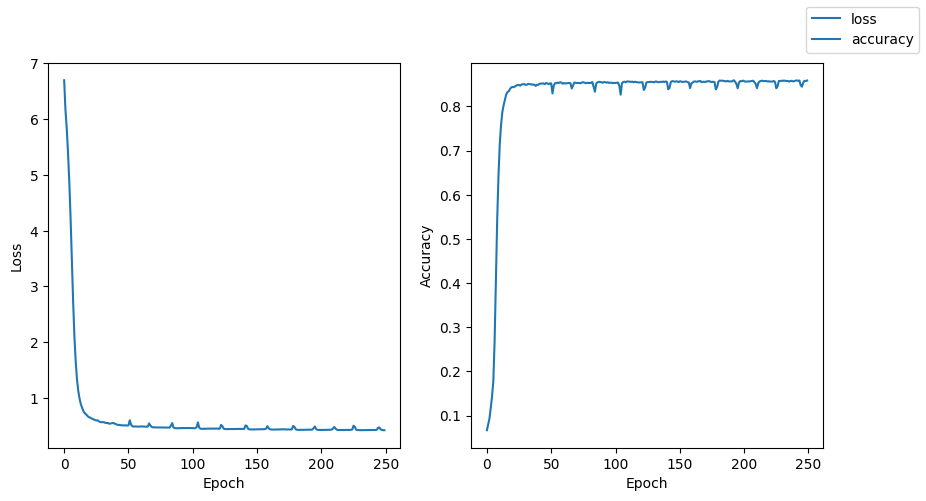

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(history.epoch, history.history['loss'], label='loss')
ax[0].set_xlabel('Epoch');
ax[0].set_ylabel('Loss');

ax[1].plot(history.epoch, history.history['accuracy'], label='accuracy')
ax[1].set_xlabel('Epoch');
ax[1].set_ylabel('Accuracy');

fig.legend();

## Generating Text

In [17]:
seed = input('Input seed >> ')
num = 100

for i in range(500):
    seq = tokenizer.texts_to_sequences([seed])
    padded_seq = pad_sequences(seq, padding='pre', maxlen=max_length - 1)
    prediction = model.predict(padded_seq, verbose=0)
    index = np.argmax(prediction, axis=-1)[0]
    seed = seed + ' ' + tokenizer.index_word[index]
    print(f'\r{seed:<1000}', end='')

Input seed >> Deep into that darkness peering,  Long I stood there, wondering, fearing
Deep into that darkness peering,  Long I stood there, wondering, fearing the song tree to the jail your hat and for the town sound over the bridge of toome today and fol the cheer revenge for skibbereen skibbereen at the lassies the rocky slopes dublin still the corporal the way dublin mountains the lassies mountain places said herring bay bragh creel he might shines see me heartfrom sinking thorn o than again very ringlets died slopes on the lassies the rocky road girl dublin still at me bubbling ties and stainless then i hear the fathers stalwart band best setting there from me now in the time died slopes over her now not at night a custom for it died of my own and smoke ill take your hat and they hair and for her slumber always for their empty there now be thou and they and at my going me songs to then not slumber gone and all at the cross the ladies in me and my soul and i be down by more he said